# DATA TRAINED PROJECT 1 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heartbrain.csv')
print(df.shape)
df.head(10)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [3]:
df.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [4]:
print(df['Gender'].unique())
print(df['Age Range'].unique())

[1 2]
[1 2]


Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


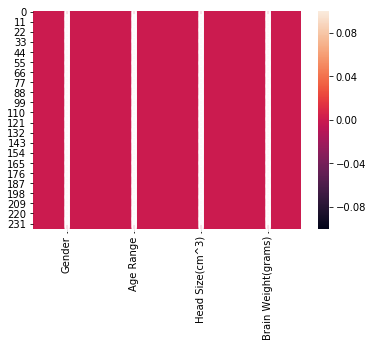

In [5]:
#### Checking For null values
print(df.isnull().sum())
sns.heatmap(df.isnull(),annot=True)

In [6]:
#### Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(237, 4)
(236, 4)


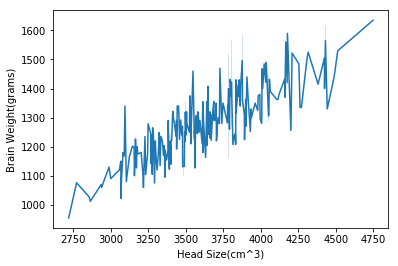

In [7]:
####EDA
sns.lineplot(x=df['Head Size(cm^3)'],y=df['Brain Weight(grams)'],data=df)
plt.show()

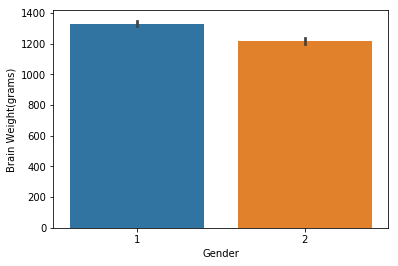

In [8]:
sns.barplot(x=df['Gender'],y=df['Brain Weight(grams)'],data=df)
plt.show()

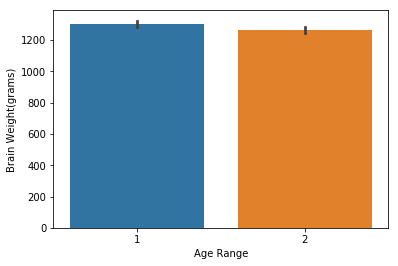

In [9]:
sns.barplot(x=df['Age Range'],y=df['Brain Weight(grams)'],data=df)
plt.show()

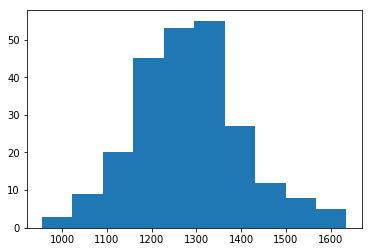

In [10]:
####Lets draw the histogram
plt.hist(x='Brain Weight(grams)',bins=10,data=df)
plt.show()

In [11]:
####Lets the Skewness of data
df.skew()

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

In [12]:
###Let Separate the input and output variable
x = df[['Head Size(cm^3)']]
y = df[['Brain Weight(grams)']]

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42 is  0.7149168473012075
r2_score corresponding to random state:  43 is  0.6404165530671617
r2_score corresponding to random state:  44 is  0.653010968876236
r2_score corresponding to random state:  45 is  0.6939862623941999
r2_score corresponding to random state:  46 is  0.5332650244375814
r2_score corresponding to random state:  47 is  0.6201411206780885
r2_score corresponding to random state:  48 is  0.6851449361873334
r2_score corresponding to random state:  49 is  0.6433491336855989
r2_score corresponding to random state:  50 is  0.7683161771318532
r2_score corresponding to random state:  51 is  0.5935686929145347
r2_score corresponding to random state:  52 is  0.6342022687682457
r2_score corresponding to random state:  53 is  0.5909146568147448
r2_score corresponding to random state:  54 is  0.6130331905389369
r2_score corresponding to random state:  55 is  0.5884150240645216
r2_score corresponding to random state:  56 is  0.7399588791116

In [15]:
####Lets do cross Validation.
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring="r2").mean()

0.4936984443261272

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [17]:
print('r2 score is ',r2_score(y_test,y_pred))
print('MSME Score is ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.7683161771318532
MSME Score is  60.36773435476799


# PROJECT 2 CONCRETE DATASET

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
df_concrete = pd.read_csv('Concrete_Data.csv')
print(df_concrete.shape)
df.head(10)

(1030, 9)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [20]:
df_concrete.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


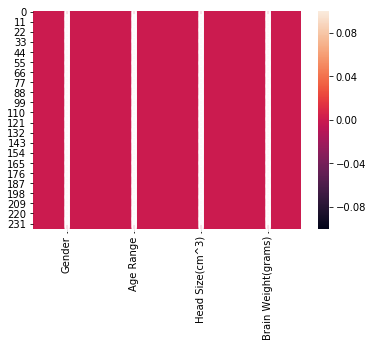

In [21]:
#### Checking For null values
print(df.isnull().sum())
sns.heatmap(df.isnull(),annot=True)

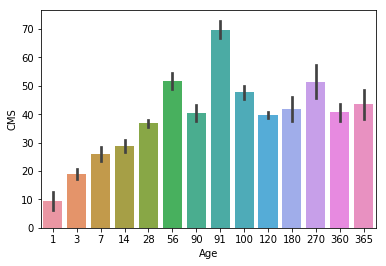

In [22]:
####EDA
sns.barplot(x='Age',y='CMS',data=df_concrete)
plt.show()

In [23]:
df_concrete['Superplasticizer'].value_counts()[0]

379

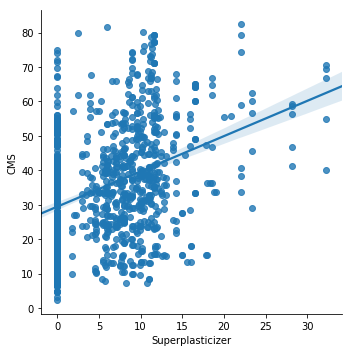

In [24]:
sns.lmplot(x='Superplasticizer',y='CMS',data=df_concrete)
plt.show()

In [25]:
df_concrete.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


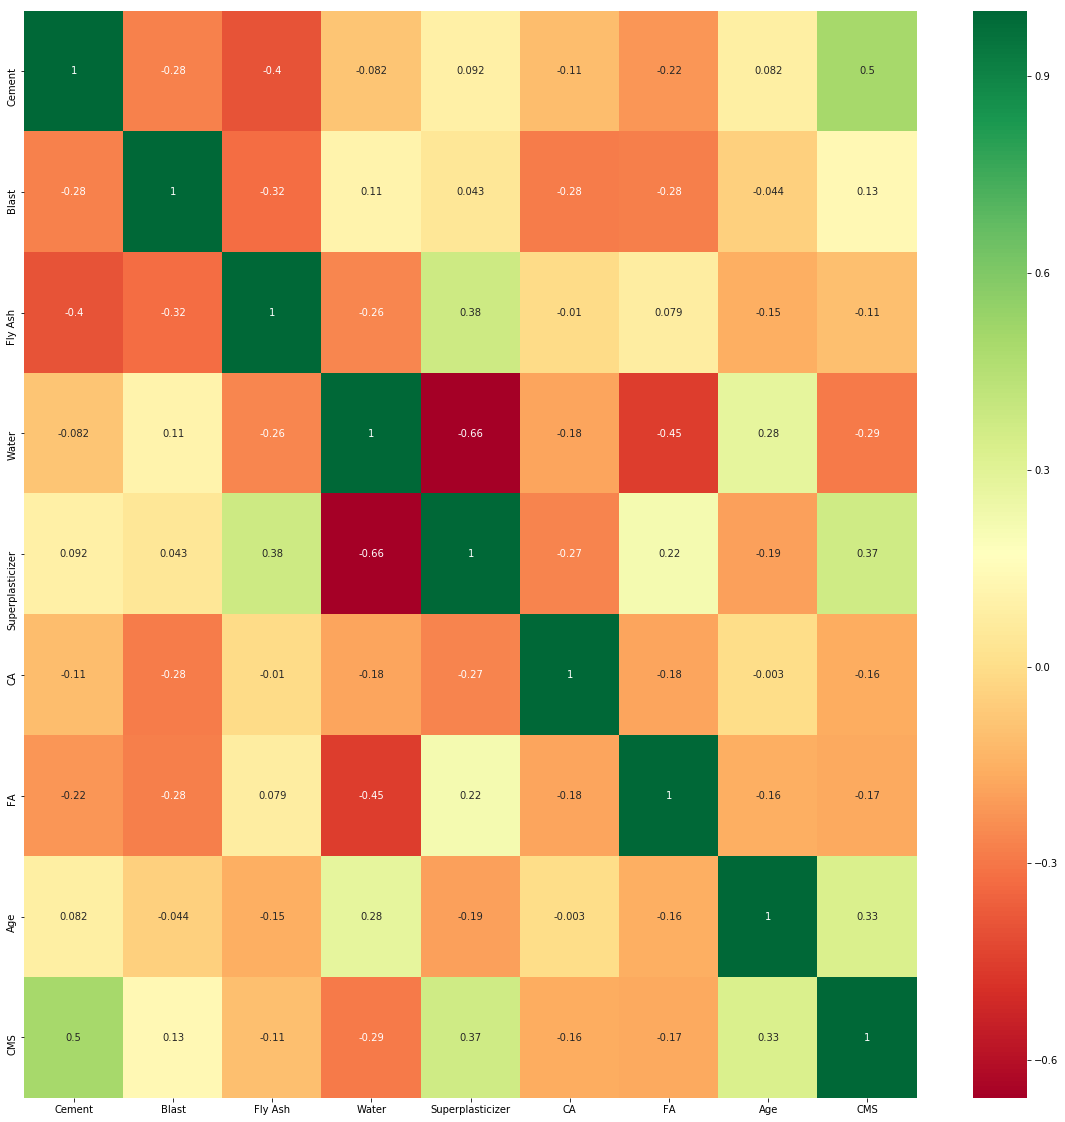

In [26]:
import matplotlib.pyplot as plt
corrmat = df_concrete.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_concrete[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
df_concrete.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
####Lets the Skewness of data
df_concrete.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [29]:
import scipy.stats as stat
import pylab

In [30]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df_concrete,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_concrete[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_concrete[feature],dist='norm',plot=pylab)
    plt.show()

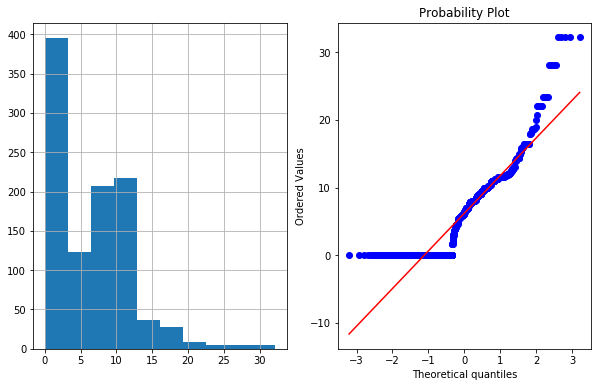

In [31]:
plot_data(df_concrete,'Superplasticizer')

In [32]:
for col in df_concrete.columns:
    if df_concrete.skew().loc[col]>0.55:
        df_concrete[col] = np.log1p(df_concrete[col])

In [33]:
df_concrete.skew()

Cement              0.509481
Blast              -0.032700
Fly Ash             0.537354
Water               0.074628
Superplasticizer   -0.324821
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

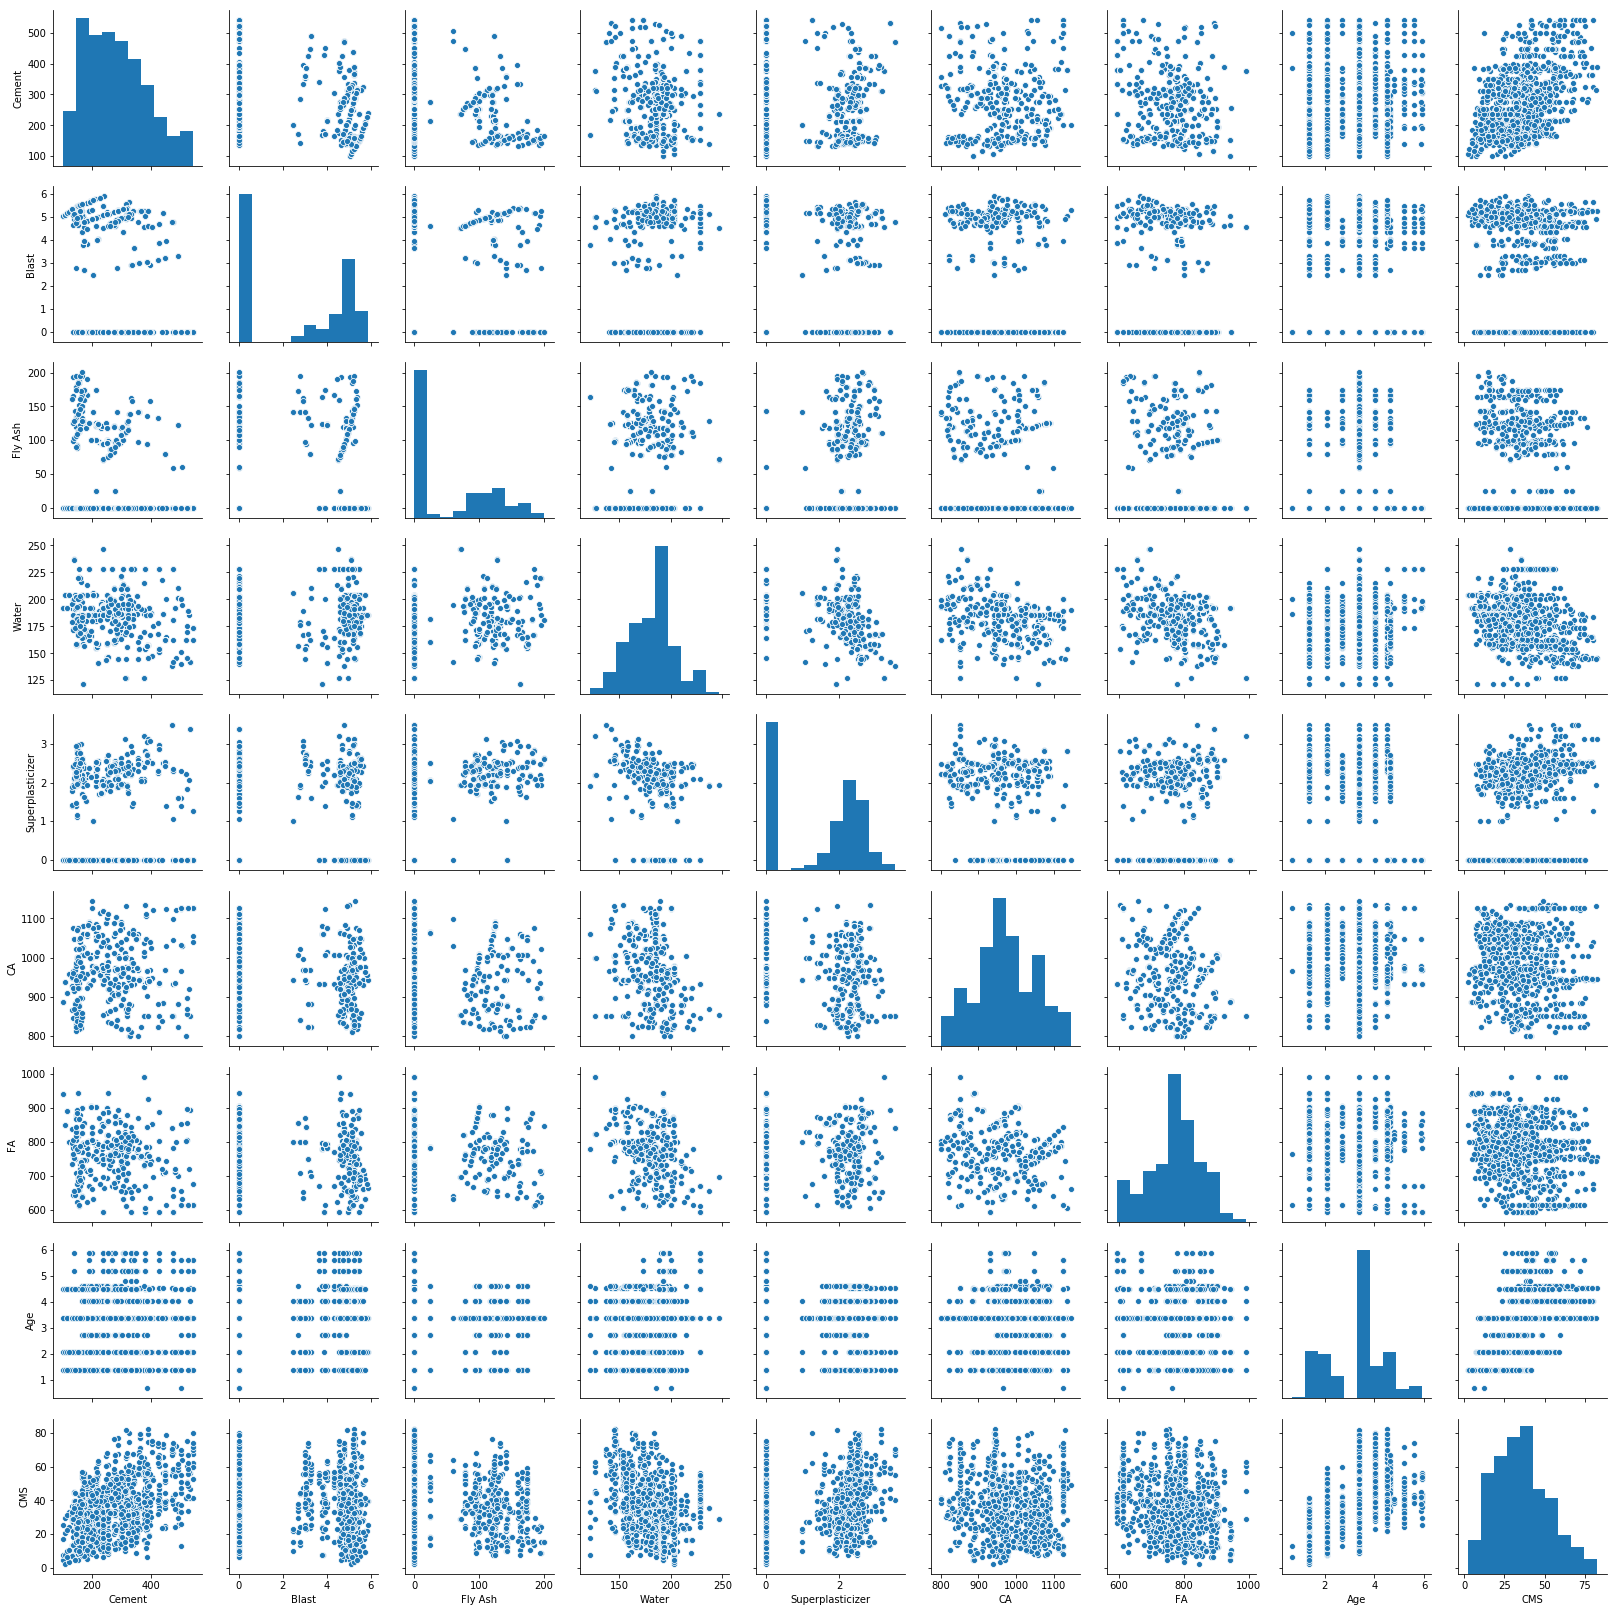

In [34]:
sns.pairplot(df_concrete)
plt.show()

In [35]:
#### Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df_concrete))
print(df_concrete.shape)
df_concrete_final = df_concrete.loc[(zscore<3).all(axis=1)]
print(df_concrete_final.shape)

(1030, 9)
(1028, 9)


In [36]:
###Let Separate the input and output variable
df_x = df_concrete_final.drop(columns = ['CMS'])
y = df_concrete_final[['CMS']]

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_x)
X = pd.DataFrame(X,columns=df_x.columns)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42 is  0.8157334390718877
r2_score corresponding to random state:  43 is  0.7799561816555318
r2_score corresponding to random state:  44 is  0.7956835400106808
r2_score corresponding to random state:  45 is  0.8045223943238069
r2_score corresponding to random state:  46 is  0.7925777179367486
r2_score corresponding to random state:  47 is  0.7932573063239552
r2_score corresponding to random state:  48 is  0.8226383192933098
r2_score corresponding to random state:  49 is  0.8257899315169119
r2_score corresponding to random state:  50 is  0.7764407729817846
r2_score corresponding to random state:  51 is  0.8159465669616908
r2_score corresponding to random state:  52 is  0.7748366186178586
r2_score corresponding to random state:  53 is  0.8178394566067204
r2_score corresponding to random state:  54 is  0.79799357917476
r2_score corresponding to random state:  55 is  0.8168961478936354
r2_score corresponding to random state:  56 is  0.83081154989025

In [39]:
####Lets do cross Validation.
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring="r2").mean()

0.6734777950226595

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [41]:
print('r2 score is ',r2_score(y_test,y_pred))
print('MSME Score is ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.8308115498902516
MSME Score is  7.061424236741105


# Diabates Dataset

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [43]:
diabates = datasets.load_diabetes()
dir(diabates)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [44]:
df_input = pd.DataFrame(diabates.data,columns=diabates.feature_names)
df_target = pd.DataFrame(diabates.target,columns=['DiseaseProgression'])

In [45]:
df_input.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [46]:
print(df_input.isnull().sum())
print(df_target.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
DiseaseProgression    0
dtype: int64


In [47]:
df = pd.concat([df_input,df_target],axis=1)

In [49]:
print(df.shape)
df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [50]:
df.dtypes

age                   float64
sex                   float64
bmi                   float64
bp                    float64
s1                    float64
s2                    float64
s3                    float64
s4                    float64
s5                    float64
s6                    float64
DiseaseProgression    float64
dtype: object

In [51]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'DiseaseProgression'],
      dtype='object')

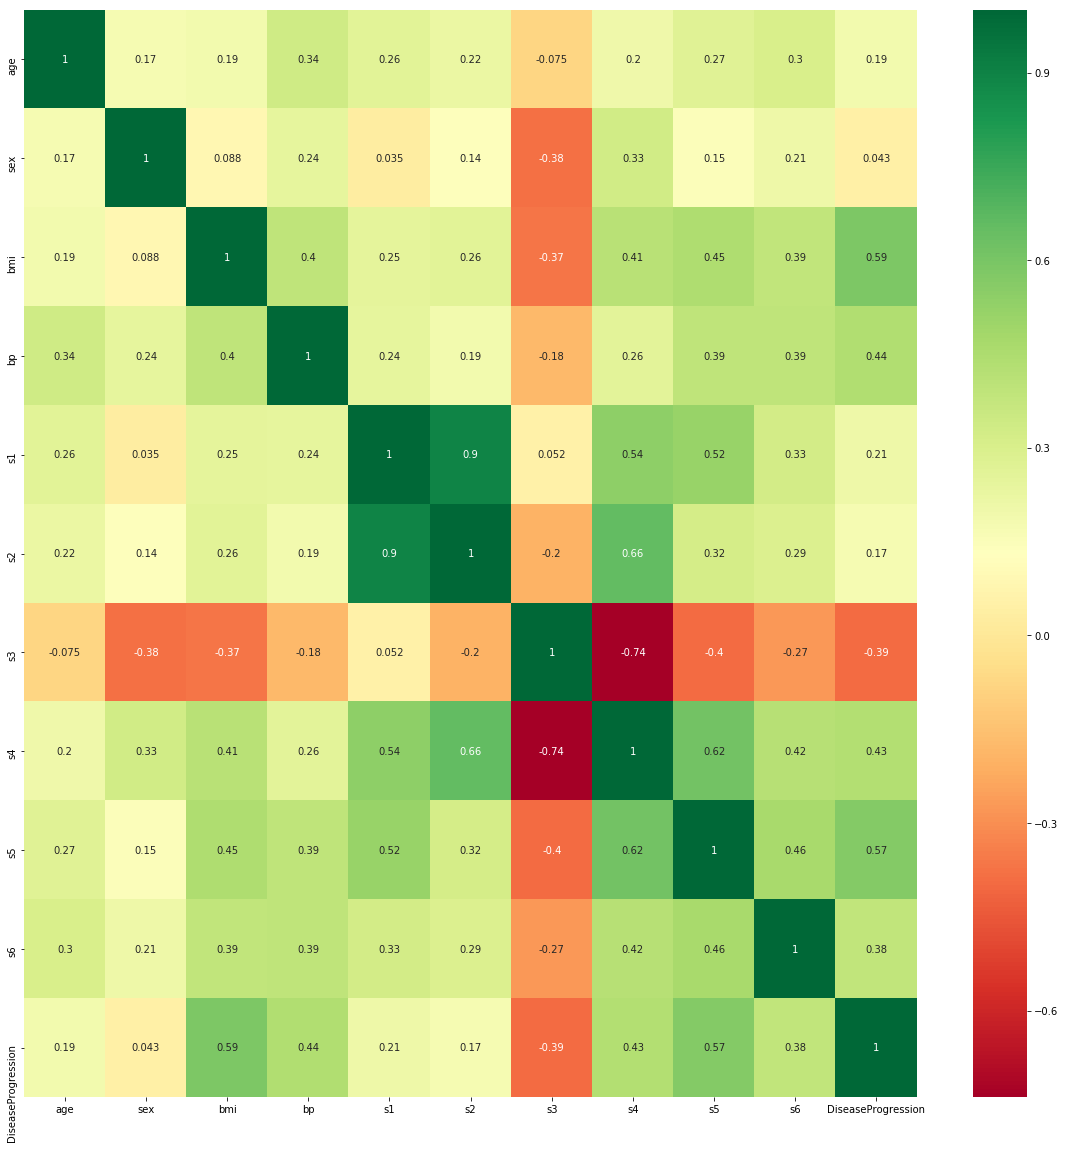

In [52]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [53]:
#### Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_new = df.loc[(zscore<3).all(axis=1)]
print(df_new.shape)

(442, 11)
(430, 11)


In [54]:
#### Separating input and output variables.
X = df.drop('DiseaseProgression',axis=1)
y = df['DiseaseProgression']

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
def maxr2_score(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2_score corresponding to random state:  42 is  0.4526066021617381
r2_score corresponding to random state:  43 is  0.5419894894683134
r2_score corresponding to random state:  44 is  0.525204262124852
r2_score corresponding to random state:  45 is  0.5188118914964637
r2_score corresponding to random state:  46 is  0.4411335114559437
r2_score corresponding to random state:  47 is  0.43146767000817665
r2_score corresponding to random state:  48 is  0.5639138729762287
r2_score corresponding to random state:  49 is  0.6091293016234851
r2_score corresponding to random state:  50 is  0.5234087472282719
r2_score corresponding to random state:  51 is  0.39823368728858155
r2_score corresponding to random state:  52 is  0.5125426786349685
r2_score corresponding to random state:  53 is  0.47852115422732566
r2_score corresponding to random state:  54 is  0.4484129539387457
r2_score corresponding to random state:  55 is  0.5164196511816805
r2_score corresponding to random state:  56 is  0.3334753734

In [57]:
####Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.4823181221114939
standard deviation in r2_score for linear Regression: 0.049266197765632194


In [58]:
#### Lets Check Different Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()

In [59]:
param = {
    'n_neighbors':range(1,40)
}

In [60]:
gknr = GridSearchCV(estimator=knr,param_grid=param,cv=5,return_train_score=False)
gknr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring=None, verbose=0)

In [61]:
print(gknr.best_params_)
print(gknr.best_score_)

{'n_neighbors': 2}
0.826406806616309


In [62]:
knr = KNeighborsRegressor(n_neighbors=2)
r_state = maxr2_score(knr,X,y)

r2_score corresponding to random state:  42 is  0.3322931226835779
r2_score corresponding to random state:  43 is  0.18190651719821427
r2_score corresponding to random state:  44 is  0.23431168455837315
r2_score corresponding to random state:  45 is  0.32735315558280575
r2_score corresponding to random state:  46 is  0.13474043120087797
r2_score corresponding to random state:  47 is  0.17689273842668563
r2_score corresponding to random state:  48 is  0.22507883198860656
r2_score corresponding to random state:  49 is  0.393230702305573
r2_score corresponding to random state:  50 is  0.24286439759472855
r2_score corresponding to random state:  51 is  0.09727329594436696
r2_score corresponding to random state:  52 is  0.2564589738212113
r2_score corresponding to random state:  53 is  0.25866660889681337
r2_score corresponding to random state:  54 is  0.22139356755657402
r2_score corresponding to random state:  55 is  0.4209655584842905
r2_score corresponding to random state:  56 is  0.061

In [63]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(knr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(knr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.2705474941383573
standard deviation in r2_score for linear Regression: 0.09388303363488344


In [64]:
from sklearn.linear_model import Lasso
lsreg = Lasso()

In [65]:
param = {
    'alpha':[0.001,0.01,0.1,1]
}

In [66]:
gklas = GridSearchCV(estimator=lsreg,param_grid=param,cv=5,return_train_score=False)
gklas.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [67]:
print(gklas.best_params_)
print(gklas.best_score_)

{'alpha': 0.1}
0.7944817574164162


In [68]:
lsreg = Lasso(alpha=0.1)
r_state = maxr2_score(lsreg,X,y)

r2_score corresponding to random state:  42 is  0.47185526169086933
r2_score corresponding to random state:  43 is  0.5367219731480062
r2_score corresponding to random state:  44 is  0.5176595852607104
r2_score corresponding to random state:  45 is  0.5351137098277763
r2_score corresponding to random state:  46 is  0.4312490900529655
r2_score corresponding to random state:  47 is  0.4111695037027997
r2_score corresponding to random state:  48 is  0.5585218401674331
r2_score corresponding to random state:  49 is  0.5849432954240141
r2_score corresponding to random state:  50 is  0.5290868256422545
r2_score corresponding to random state:  51 is  0.3966926541297934
r2_score corresponding to random state:  52 is  0.49819779749903614
r2_score corresponding to random state:  53 is  0.49419477581682114
r2_score corresponding to random state:  54 is  0.4489228294815475
r2_score corresponding to random state:  55 is  0.5185438394150756
r2_score corresponding to random state:  56 is  0.331756338

In [69]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lsreg,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lsreg,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.4795161392064994
standard deviation in r2_score for linear Regression: 0.048177654991563575


In [70]:
#### We are fail to obtain the optimal value lets check with ensemble technique:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [71]:
param = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[10,100,500,1000]
}

In [72]:
gk = GridSearchCV(estimator=gbr,param_grid=param,cv=5,return_train_score=False)
gk.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [73]:
print(gk.best_params_)
print(gk.best_score_)

{'learning_rate': 0.1, 'n_estimators': 1000}
0.9238846989516893


In [74]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r_state = maxr2_score(gbr,X,y)

r2_score corresponding to random state:  42 is  0.35054379780271216
r2_score corresponding to random state:  43 is  0.30057041306738386
r2_score corresponding to random state:  44 is  0.2507245295230327
r2_score corresponding to random state:  45 is  0.2689282504076558
r2_score corresponding to random state:  46 is  0.3289673533412608
r2_score corresponding to random state:  47 is  0.2829406246484061
r2_score corresponding to random state:  48 is  0.4461049475404866
r2_score corresponding to random state:  49 is  0.5397512819275987
r2_score corresponding to random state:  50 is  0.4363435856949598
r2_score corresponding to random state:  51 is  0.1508241647277746
r2_score corresponding to random state:  52 is  0.1874625158289671
r2_score corresponding to random state:  53 is  0.23463784112960617
r2_score corresponding to random state:  54 is  0.21972284532863995
r2_score corresponding to random state:  55 is  0.1928109503703943
r2_score corresponding to random state:  56 is  0.19248383

In [75]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(gbr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(gbr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.25555919870445354
standard deviation in r2_score for linear Regression: 0.10356384811629775


In [76]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor()

In [77]:
param = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[10,100,500,1000],
    'base_estimator':[lr,lsreg,DecisionTreeRegressor()]
}

In [78]:
gka = GridSearchCV(estimator=ada,param_grid=param,cv=5,return_train_score=False)
gka.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 500, 1000], 'base_estimator': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, ...lit=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [79]:
print(gka.best_params_)
print(gka.best_score_)

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), 'learning_rate': 0.01, 'n_estimators': 1000}
0.8905910566614444


In [80]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.01,n_estimators=1000)
r_state = maxr2_score(ada,X,y)

r2_score corresponding to random state:  42 is  0.40816969947096104
r2_score corresponding to random state:  43 is  0.4086033897841511
r2_score corresponding to random state:  44 is  0.3442179862165009
r2_score corresponding to random state:  45 is  0.39576715328717393
r2_score corresponding to random state:  46 is  0.39672849141826616
r2_score corresponding to random state:  47 is  0.3213586512468086
r2_score corresponding to random state:  48 is  0.46164276786163916
r2_score corresponding to random state:  49 is  0.5404577975034568
r2_score corresponding to random state:  50 is  0.3945464450378623
r2_score corresponding to random state:  51 is  0.30509568934852305
r2_score corresponding to random state:  52 is  0.325814359063648
r2_score corresponding to random state:  53 is  0.4150139920879574
r2_score corresponding to random state:  54 is  0.2191803504031964
r2_score corresponding to random state:  55 is  0.47578303745128225
r2_score corresponding to random state:  56 is  0.2420959

In [81]:
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(ada,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(ada,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.3711605251218976
standard deviation in r2_score for linear Regression: 0.04914153878987582
